<a href="https://colab.research.google.com/github/vilsonrodrigues/ComputerVision/blob/master/Body-Point-Identification/body_point_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libs**

In [4]:
import cv2
import matplotlib.pyplot as plt
import zipfile
cv2.__version__

'4.1.2'

**Connecting Google Drive**

In [5]:
from google.colab import drive
drive.mount("/content/drive") #destination folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Pose path

In [0]:
pose_path = "/content/drive/My Drive/Arquivos-Reconhecimentos-de-Gestos/pose.zip"

Zip Extraction

In [0]:
zip_object = zipfile.ZipFile(file = pose_path, mode = "r")#r == read
zip_object.extractall("./")#extract on

Image Extraction

In [0]:
img_path = "/content/drive/My Drive/Arquivos-Reconhecimentos-de-Gestos/imagens.zip"
zip_object = zipfile.ZipFile(file = img_path, mode = "r")
zip_object.extractall("./")
zip_object.close()

**Path MPII**

In [0]:
archive_proto = "/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
archive_weights = "/content/pose/body/mpi/pose_iter_160000.caffemodel"

Loading image

In [0]:
img = cv2.imread("/content/imagens/body/multiple/multiple_1.jpeg")

In [15]:
img.shape

(640, 640, 3)

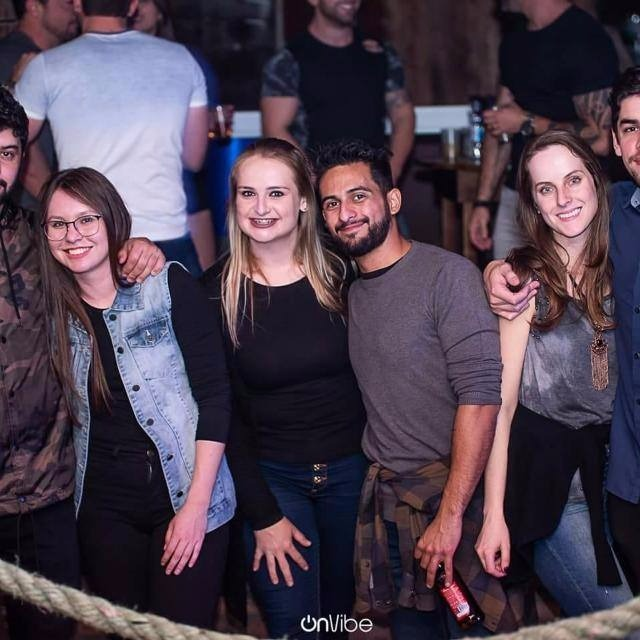

In [17]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Height and width

In [0]:
img_height = img.shape[1]
img_width  = img.shape[0]

In [19]:
img_width,img_height

(640, 640)

**Reading Model MPII**

In [0]:
model = cv2.dnn.readNetFromCaffe(archive_proto,archive_weights)

**Reshape image**

In [0]:
height_input = 368
width_input = int((height_input/img_height)*img_width)#keep proportion

In [23]:
width_input

368

Conversion img-opencv to blob caffe

In [0]:
blob_input = cv2.dnn.blobFromImage(image = img, 
                                   scalefactor = 1.0/255, 
                                   size = (width_input, height_input),
                                   mean = (0,0,0),#Channel rgb
                                   swapRB = False,
                                   crop = False #no cut img
                                   )

**Using MPII**

In [0]:
model.setInput(blob_input)
output = model.forward()#prevision

In [27]:
output.shape
#value 1 = id img
#value 2 = key points index
#value 3 = indicates the position where each map point is located vertically
#value 4 = indicates the position where each map point is located horizontally

(1, 44, 46, 46)

**Visualization**

Head - 0, 

Neck - 1, 

Right Shoulder - 2, 

Right Elbow - 3,

Right Wrist - 4, 

Left Shoulder - 5, 

Left Elbow - 6, 

Wrist Left - 7, 

Right Hip - 8, 

Right Knee - 9, 

Right Ankle - 10, 

left hip - 11, 

left knee - 12, 

ankle left - 13, 

chest - 14, 

bottom - 15

In [0]:
point = 1
trust_map = output[0, point,:,:]
trust_map = cv2.resize(trust_map,(img_width,img_height))

Plot

(-0.5, 639.5, 639.5, -0.5)

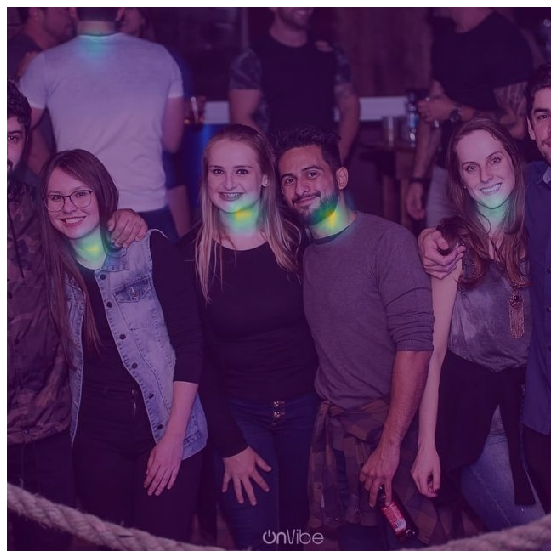

In [43]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(trust_map, alpha = 0.5)
plt.axis("off")